In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1 = pd.read_csv(r'201801-citibike-tripdata.csv')
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718994 entries, 0 to 718993
Data columns (total 15 columns):
tripduration               718994 non-null int64
starttime                  718994 non-null object
stoptime                   718994 non-null object
start station id           718994 non-null int64
start station name         718994 non-null object
start station latitude     718994 non-null float64
start station longitude    718994 non-null float64
end station id             718994 non-null int64
end station name           718994 non-null object
end station latitude       718994 non-null float64
end station longitude      718994 non-null float64
bikeid                     718994 non-null int64
usertype                   718994 non-null object
birth year                 718994 non-null int64
gender                     718994 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 82.3+ MB


In [4]:
df_1.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,7.189940e+05,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000
mean,8.268107e+02,1469.519095,40.737894,-73.982934,1460.948474,40.737620,-73.983203,26078.046315,1977.765945,1.169969
std,3.279694e+04,1398.626487,0.044702,0.018219,1396.759046,0.044525,0.018273,6311.931441,12.016931,0.472668
min,6.100000e+01,72.000000,40.646538,-74.017134,72.000000,40.646538,-74.033552,14529.000000,1885.000000,0.000000
25%,3.190000e+02,377.000000,40.719079,-73.994685,376.000000,40.719105,-73.994758,19558.000000,1969.000000,1.000000
50%,5.100000e+02,497.000000,40.739355,-73.985649,497.000000,40.739323,-73.986580,28538.000000,1980.000000,1.000000
75%,8.420000e+02,3170.000000,40.756687,-73.974987,3169.000000,40.756405,-73.975232,31571.000000,1988.000000,1.000000
max,1.951005e+07,3664.000000,45.506364,-73.568906,3664.000000,45.506364,-73.568906,33522.000000,2002.000000,2.000000


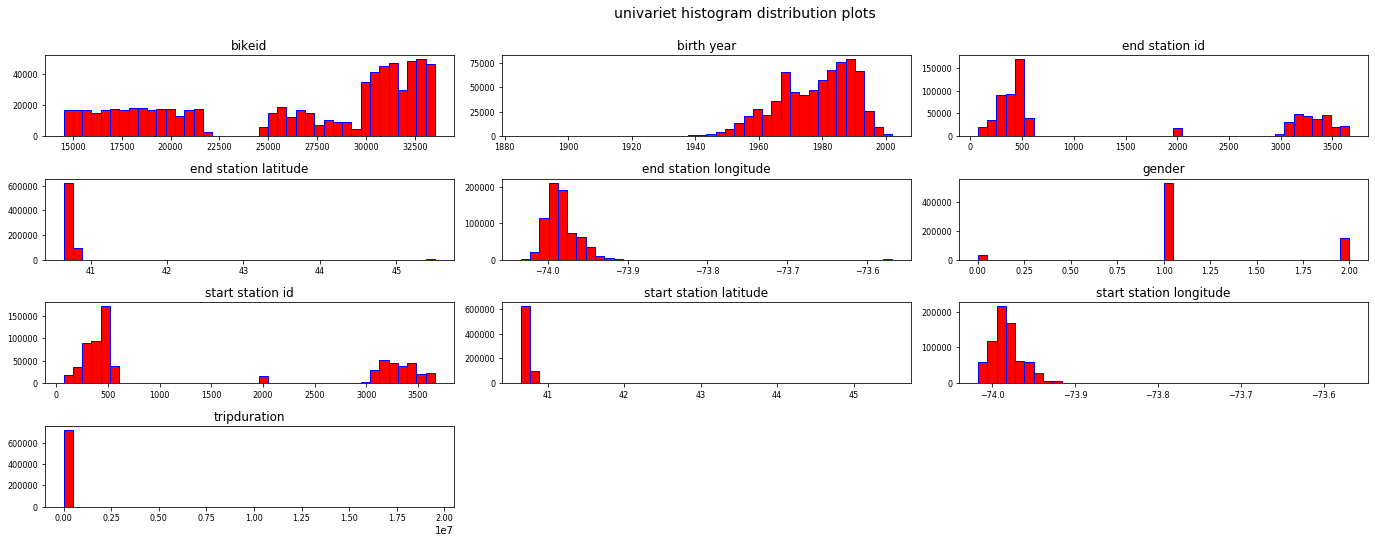

In [6]:
# Achieving a visual understanding of the data: histograms for everything
features_list = df_1.columns
df_1[features_list].hist(bins=40, edgecolor='b', linewidth=1.0, xlabelsize=8, 
                         ylabelsize=8, grid=False, figsize = (16,6), 
                         color = 'red')

plt.tight_layout(rect=(0,0,1.2, 1.2))
plt.suptitle('univariet histogram distribution plots', x=.65, y=1.25, fontsize=14)
plt.show()


718000


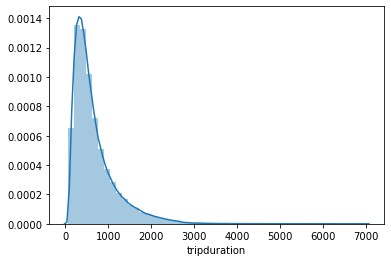

In [8]:
# revealing a better histogram for trip durations - crudely excluding the top 1000 instances
trip_durations = df_1['tripduration']
trip_durations = trip_durations.sort_values()
trip_durations = trip_durations[0:718000]
print(len(trip_durations))
sns.distplot(trip_durations)

39


0     830
1     933
2     939
3     940
4    1094
dtype: int64


Text(0.5, 0.98, 'time of departure histogram')

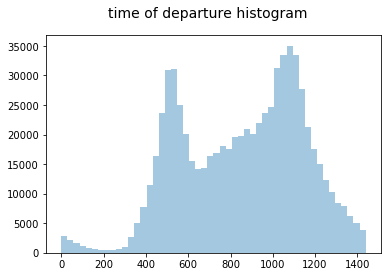

In [9]:
# Understanding bikeshare usage throughout the day (in minutes)
# plotting departure times and their frequency over the course of a month with a histogram
Day_times = []
print(int(str(df_1['starttime'][32])[14:16]))
for i in df_1['starttime'] :
    
    mins = 60*int(str(i)[11:13]) + int(str(i)[14:16])
    Day_times.append(mins)
    
Day_times = pd.Series(data=Day_times)
print(Day_times.head())
    
df_1['day_times'] = Day_times
sns.distplot(Day_times, kde=False);
plt.suptitle('time of departure histogram', fontsize=14)

Unique stations in df_1: 763


Text(0.5, 0.98, 'Station Arrival Rate against Time of Day')

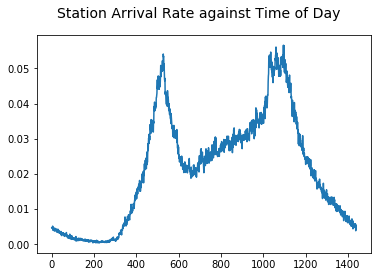

In [17]:
# better understanding the data that makes the above trend
arr_rate = np.array([0 for i in range(1440)], dtype=np.float)
for t in Day_times:
    arr_rate[t] += 1
arr_rate /= 31.0 # 31 days in January - gives average count per minute in one day
station_count = df_1['start station id'].nunique()
print("Unique stations in df_1:", station_count)
arr_rate /= station_count # Arrival rate per station on average
plt.plot(arr_rate)
plt.suptitle('Station Arrival Rate against Time of Day', fontsize=14)

Text(0.5, 1.0, 'Measured and Modeled Bike Arrivals')

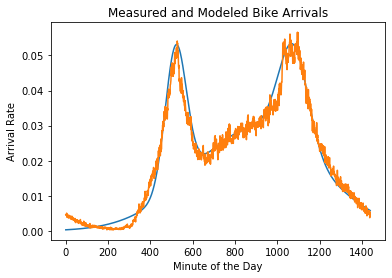

In [18]:
# building a function to model the above trend, and plotting that model against the actual data
import scipy.stats as stats
minutes = np.array(range(1440))
mu1 = 520
sigma1 = 50
factor1 = 5
dist1 = lambda x: factor1 * stats.norm.pdf(x, mu1, sigma1)
mu2 = 1075
sigma2 = 70
factor2 = 5
dist2 = lambda x: factor2 * stats.norm.pdf(x, mu2, sigma2)
mu3 = 900
sigma3 = 300
factor3 = 22
dist3 = lambda x: factor3 * stats.norm.pdf(x, mu3, sigma3)
dist_final = lambda x: dist1(x) + dist2(x) + dist3(x)
plt.plot(minutes, dist_final(minutes), minutes, arr_rate)
plt.xlabel("Minute of the Day")
plt.ylabel("Arrival Rate")
plt.title("Measured and Modeled Bike Arrivals")

In [10]:
# picking out top stations and their appearance frequency in both start & end station ID
ssid = df_1['start station id']
esid = df_1['end station id']
concated = pd.concat([ssid, esid], ignore_index=True)
# print('id \t counts')
# top_vals = list(concated.value_counts())
top_vals = pd.DataFrame(data=concated.value_counts()[:10], columns=['id'])
top_vals.head()

,id
519,16106
435,10225
3255,9808
497,9427
402,9310


In [16]:
# writing a station trimming function that keeps only instances of data where our preferred stations are kept.
def station_df_trimmer(df_og, list_of_stations ):
    df_copied = df_og.copy()
    df_copied = df_copied[df_copied['end station id'].isin(list_stations)]
    return df_copied[df_copied['start station id'].isin(list_stations)]

# hard code
# df_copy = df_1.copy()
list_stations = [519, 435, 3255, 497]
# df_copy = df_copy[df_copy['end station id'].isin(list_stations)]
# df_copy = df_copy[df_copy['start station id'].isin(list_stations)]

df_cut = station_df_trimmer(df_1,list_stations)

print(df_cut.shape)

(920, 16)


In [17]:
def prob_finder(df, list_stations):
    prob_df = pd.DataFrame(index=list_stations, columns=list_stations)
    for i in list_stations:
        for z in list_stations:
            # finds the instances starting with i, with the 'probabilities' going to z. 
            temp_only_i = df[df['start station id']==i]
            prob_df.loc[i][z] = (temp_only_i['end station id']==z).mean() # what we just set is the probability that the bike does go to z. 
    print('starting station represented by rows, probabilities of end stations in columns')
    #
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(prob_df)
    print(repr(prob_df.to_dict(orient='index')))
    return prob_df

count    920.000000
mean       0.115247
std        0.051805
min        0.000000
25%        0.091267
50%        0.115944
75%        0.150823
max        0.234868
dtype: float64

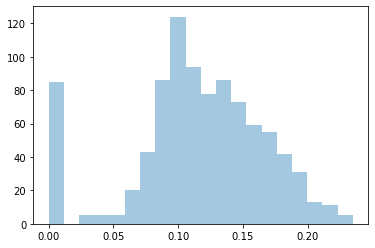

In [18]:
# plotting speed distribution, based on station latitudes, longitudes, and tripdurations. 
distances = []
speeds = []
for i in range(df_cut.shape[0]):
    startlat = df_cut['start station latitude'].iloc[i]
    startlong = df_cut['start station longitude'].iloc[i]
    endlat = df_cut['end station latitude'].iloc[i]
    endlong = df_cut['end station longitude'].iloc[i]
    #
    lat_conv = 69 # Approximate number of miles to a degree of latitude
    long_conv = 53 # Approximate number of miles to a degree of longitude at NYC's latitude
    #
    ns_dist = lat_conv * abs(startlat - endlat)
    ew_dist = long_conv * abs(startlong - endlong)
    #
    distances.append(ns_dist + ew_dist)
    #
    time_minutes = df_cut['tripduration'].iloc[i] / 60.0
    speed = (ns_dist + ew_dist) / time_minutes
    speeds.append(speed)
distances = pd.Series(data=distances)
speeds = pd.Series(data=speeds)
sns.distplot(speeds, kde=False);
speeds.describe()

In [38]:
# running the probability matrix on the cut dataframe
list_stations = [519, 435, 3255, 497]
probabilities = prob_finder(df_cut, list_stations)

starting station represented by rows, probabilities of end stations in columns


,519,435,3255,497
519,0.0571429,0.310714,0.239286,0.392857
435,0.398374,0.0813008,0.345528,0.174797
3255,0.34058,0.282609,0.173913,0.202899
497,0.378906,0.335938,0.191406,0.09375


{519: {519: 0.05714285714285714, 435: 0.3107142857142857, 3255: 0.2392857142857143, 497: 0.39285714285714285}, 435: {519: 0.3983739837398374, 435: 0.08130081300813008, 3255: 0.34552845528455284, 497: 0.17479674796747968}, 3255: {519: 0.34057971014492755, 435: 0.2826086956521739, 3255: 0.17391304347826086, 497: 0.2028985507246377}, 497: {519: 0.37890625, 435: 0.3359375, 3255: 0.19140625, 497: 0.09375}}
